In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

from matplotlib import rcParams
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
rcParams['text.usetex']         = True
rcParams['font.family']         = 'sans-serif'
rcParams['font.sans-serif']     = ['Helvetica']

In [32]:
f_s = 'x**2 - 1'
f = sp.lambdify(('x'),f_s,'numpy')
a = 0
b = 10

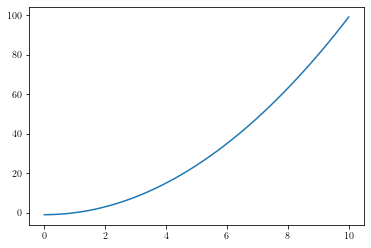

In [33]:
x = np.linspace(a,b,int(100*abs(a-b)))
plt.plot(x,f(x))
plt.show()

In [34]:
def bisect_root(f,a,b,M=1e5,T=1e-10,E=1e-10):
    assert f(a)*f(b) < 0,'Not guranteed that zero exists by IVT-- try another interval'
    
    c_steps = []
    
    for i in range(int(M)):
        c = (a+b)/2
        c_steps.append(c)
        
        if abs(a-b) < T or abs(f(c)) < E:
            break
        
        if f(c)*f(a) < 0:
            b = c
        elif f(c)*f(b) < 0:
            a = c
        
    return np.array(c_steps)

In [35]:
root = bisect_root(f,a,b)
print(root)
print(f(root))

[5.         2.5        1.25       0.625      0.9375     1.09375
 1.015625   0.9765625  0.99609375 1.00585938 1.00097656 0.99853516
 0.99975586 1.00036621 1.00006104 0.99990845 0.99998474 1.00002289
 1.00000381 0.99999428 0.99999905 1.00000143 1.00000024 0.99999964
 0.99999994 1.00000009 1.00000001 0.99999998 1.         1.00000001
 1.         1.         1.         1.         1.         1.
 1.        ]
[ 2.40000000e+01  5.25000000e+00  5.62500000e-01 -6.09375000e-01
 -1.21093750e-01  1.96289062e-01  3.14941406e-02 -4.63256836e-02
 -7.79724121e-03  1.17530823e-02  1.95407867e-03 -2.92754173e-03
 -4.88221645e-04  7.32555985e-04  1.22074038e-04 -1.83097087e-04
 -3.05173453e-05  4.57768911e-05  7.62940908e-06 -1.14440591e-05
 -1.90734772e-06  2.86102500e-06  4.76837215e-07 -7.15255609e-07
 -1.19209286e-07  1.78813942e-07  2.98023226e-08 -4.47034831e-08
 -7.45058060e-09  1.11758709e-08  1.86264515e-09 -2.79396772e-09
 -4.65661287e-10  6.98491931e-10  1.16415322e-10 -1.74622983e-10
 -2.9103830

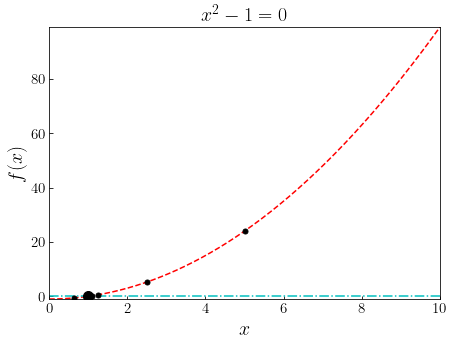

In [37]:
x = np.linspace(a,b,int(100*abs(a-b)))

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5))

ax.plot(x,f(x),'r--')
ax.axhline(0,color='c',linestyle='-.')
ax.plot(root[:-1],f(root)[:-1],'k.',markersize=10)
ax.plot(root[-1],f(root)[-1],'k.',markersize=20)

ax.set_ylabel(r'$f(x)$',size=20)
ax.set_xlabel(r'$x$',size=20)
ax.set_title(r'$%s = 0$'%sp.latex(sp.parse_expr(f_s)),fontsize=20)
ax.set_xlim(a,b)
ax.set_ylim(f(a),f(b))
ax.tick_params(axis='both',which='major',labelsize=15,direction='in')

plt.show()